# 15-plots in plotly

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# import dataset

df = pd.read_csv("./data/co2_fuel_consumption.csv")
df.head()

,engine_size,cylinders,transmission,fuel_consumption,co2_emissions
0,2.4,4,AM8,9.9,199
1,3.5,6,AS9,12.2,252
2,3.5,6,AS9,12.2,258
3,3.0,6,AM7,9.1,210
4,3.5,6,AM9,11.1,261


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_size       1056 non-null   float64
 1   cylinders         1056 non-null   int64  
 2   transmission      1056 non-null   object 
 3   fuel_consumption  1056 non-null   float64
 4   co2_emissions     1056 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 41.4+ KB


In [5]:
df.columns

Index(['engine_size', 'cylinders', 'transmission', 'fuel_consumption',
       'co2_emissions'],
      dtype='object')

# 1. Scatter Plot

In [10]:
fig1 = px.scatter(df, x='fuel_consumption', y='engine_size')
fig1.show()
# save the plot
fig1.write_image("./outputs/plotly_plots/fig1.png", scale=3)

# 2. Line Plot

In [13]:
# sort the data
df_line = df.sort_values(by=['engine_size'])

fig2 = px.line(df_line, x='engine_size', y='co2_emissions')
fig2.show()

# save the plot
fig2.write_image("./outputs/plotly_plots/fig2.png", scale=3)

# 3. Bar Plot

In [15]:
# group values based on means
df_bar = df.groupby(['transmission']).mean().reset_index()
df_bar.head()

,transmission,engine_size,cylinders,fuel_consumption,co2_emissions
0,A10,6.200000,8.000000,16.225000,329.625000
1,A4,1.833333,4.000000,9.866667,207.333333
2,A5,4.087500,6.250000,15.262500,292.375000
3,A6,4.161728,6.518519,15.217284,292.814815
4,A7,4.177778,7.555556,15.566667,319.777778


In [16]:
fig3 = px.bar(df_bar, x='engine_size', y='co2_emissions')
fig3.show()

# save the plot
fig3.write_image("./outputs/plotly_plots/fig3.png", scale=3)

<Axes: xlabel='engine_size', ylabel='co2_emissions'>

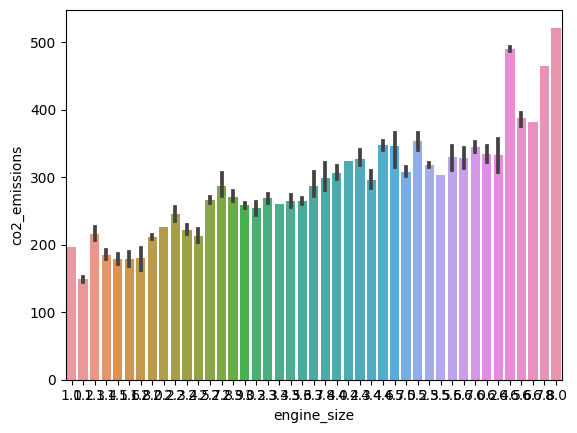

In [17]:
# seaborn does not need to make mean groups

sns.barplot(df, x='engine_size', y='co2_emissions')

In [20]:
df.columns

Index(['engine_size', 'cylinders', 'transmission', 'fuel_consumption',
       'co2_emissions'],
      dtype='object')

# 4. Boxplot

In [21]:
# Box plot

fig4 = px.box(df, x='transmission', y='co2_emissions')
fig4.show()

# save the plot
fig4.write_image("./outputs/plotly_plots/fig4.png", scale=3)

# 5. Violin plot

In [25]:
# violon plot

fig5 = px.violin(df, x='transmission', y='co2_emissions', box=True)
fig5.show()
# save the plot
fig5.write_image("./outputs/plotly_plots/fig5.png", scale=3)

# 6. Histogram

In [27]:
#6 histogram

fig6 = px.histogram(df, x='fuel_consumption')
fig6.show()

# save the plot
fig6.write_image("./outputs/plotly_plots/fig6.png", scale=3)

# 7. Pie Chart

In [28]:
# first we have to check the dataset
df['transmission'].value_counts()

transmission
AS8     211
AS6     135
M6      112
A9       91
AM7      91
A6       81
A8       76
AS10     52
AV       39
AV7      24
M7       19
AV6      16
AS7      16
AS9      16
AM8      15
AM6      14
M5       10
A7        9
A10       8
A5        8
AV8       4
A4        3
AV10      3
AS5       2
AM9       1
Name: count, dtype: int64

In [29]:
# piechart
df_pie = df['transmission'].value_counts().reset_index()
df_pie.columns = ['transmission', 'count']
fig7 = px.pie(df_pie, values='count', names='transmission')
fig7.show()

# save the plot
fig7.write_image("./outputs/plotly_plots/fig7.png", scale=3)

# 8. scatter 3D plot

In [31]:
# scatter 3d plot
fig8 = px.scatter_3d(df, x='transmission', y='co2_emissions', z='engine_size', color='transmission')
fig8.show()

# save the plot in html
fig8.write_html("./outputs/plotly_plots/fig8.html")

# 9. Area chart

In [32]:
# area chart
df_area = df.sort_values(by=['co2_emissions'])

fig9 = px.area(df_area, x='engine_size', y='co2_emissions')
fig9.show()

# save the plot
fig9.write_image("./outputs/plotly_plots/fig9.png", scale=3)

# 10. Bubble Chart

In [33]:
# bubble chart

fig10 = px.scatter(df, x='engine_size', y='co2_emissions', size='engine_size', color='engine_size')
fig10.show()

# 11. Sunburst chart

In [36]:
df_sunburst = df.groupby(['engine_size', 'co2_emissions']).size().reset_index(name='counts')
df_sunburst

,engine_size,co2_emissions,counts
0,1.0,196,1
1,1.2,143,1
2,1.2,148,1
3,1.2,151,1
4,1.2,153,1
...,...,...,...
629,6.6,388,2
630,6.6,397,4
631,6.7,382,3
632,6.8,465,1


In [37]:
# 11 sunburst chart

fig11 = px.sunburst(df_sunburst, path=['engine_size', 'co2_emissions'], values='counts')
fig11.show()

# save this plot as html
fig11.write_html("./outputs/plotly_plots/fig11.html")

#save this plot
fig11.write_image("./outputs/plotly_plots/fig11.png", scale=3)

- Let's try another sunburst plot

In [38]:
# create sunburst plot on titanic dataset
import plotly.express as px
import seaborn as sns
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Create a sunburst plot
fig = px.sunburst(titanic, 
                  path=['sex','class', 'who', 'alive', 'alone'], 
                  values='survived' , color='sex')
# Show the plot
fig.show()

c:\Users\khan\miniconda3\envs\python_eda\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\khan\miniconda3\envs\python_eda\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\khan\miniconda3\envs\python_eda\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\khan\minic

# 12. Parallel Coordinates plot

In [39]:
# Load Iris dataset
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [40]:
# Add a numeric species_id based on species names for coloring
iris['species_id'] = iris['species'].astype('category').cat.codes

# Parallel Coordinates Plot
fig12 = px.parallel_coordinates(iris, color='species_id', labels={'species_id': 'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()

# save the plot in html
fig12.write_html("./outputs/plotly_plots/fig12.html")

#save the plot
fig12.write_image("./outputs/plotly_plots/fig12.png", scale=3)

# 13. Desity contour plot

In [41]:
# Desity contour plot

fig13 = px.density_contour(iris, x='sepal_length', y='sepal_width', color='species')
fig13.show()
# save this plot
fig13.write_image("./outputs/plotly_plots/fig13.png", scale=3)

# 14. Ternary Plot

In [42]:
# Ternary Plot

fig14 = px.scatter_ternary(iris, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()

# save this plot
fig14.write_image("./outputs/plotly_plots/fig14.png", scale=3)

# 15. Polar chart (Radar Chart)

In [43]:
# Polar chart (Radar Chart)

df_radar = iris.groupby(['species']).mean().reset_index()

fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()

# save the plot
fig15.write_image("./outputs/plotly_plots/fig15.png", scale=3)